In [45]:
import pandas as pd
import numpy as np
from sklearn import ensemble, model_selection, decomposition, preprocessing, tree
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('./data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# 一是Cabin缺失值太多  二是是否生还与舱门无关 直接删掉 
data.drop(['Cabin'], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [8]:
# 将性别转为数值型
data['Sex'] = (data['Sex'] == 'male').astype(int)
# 将舱门转为数值型
data['Embarked'] = data['Embarked'].apply(lambda x: data['Embarked'].unique().tolist().index(x))

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [10]:
# Embarked 中又两个缺失值值 数量比较少 直接删掉
index = data[data['Embarked'].isnull()].index
data.drop(index=index, inplace=True)

In [11]:
data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].mean())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 83.5+ KB


In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# 查看是否有异常值
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,9.9,45.500,90.00,223.5000,446.000000,668.5,802.0000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0,0.000,0.00,0.0000,0.000000,1.0,1.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.000,1.00,2.0000,3.000000,3.0,3.0000,3.00000,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0,0.000,0.00,0.0000,1.000000,1.0,1.0000,1.00000,1.0000
Age,891.0,29.699118,13.002015,0.42,1.0,6.000,16.00,22.0000,29.699118,35.0,47.0000,65.00000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.000,0.00,0.0000,0.000000,1.0,1.0000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0,0.000,0.00,0.0000,0.000000,0.0,2.0000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.0,7.225,7.55,7.9104,14.454200,31.0,77.9583,249.00622,512.3292
Embarked,891.0,0.368126,0.647601,0.00,0.0,0.000,0.00,0.0000,0.000000,1.0,1.0000,2.00000,3.0000


In [15]:
data.drop(['Ticket', 'Fare', 'Name'], axis=1, inplace=True)

In [16]:
# 然后开始拆分训练集和测试集
# 先分训练集和测试集 
X = data.loc[:, data.columns != 'Survived']
y = data.loc[:, 'Survived']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)

In [17]:
# 样本有轻微的不均衡问题
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0])

In [19]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,595,2,1,37.000000,1,0,0
1,625,3,1,21.000000,0,0,0
2,342,1,0,24.000000,3,2,0
3,793,3,0,29.699118,8,2,0
4,768,3,0,30.500000,0,0,2


In [20]:
# 接下来开始填充年龄缺失值
X_train.loc[:, 'Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test.loc[:, 'Age'] = X_test['Age'].fillna(X_train['Age'].mean())

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 7 columns):
PassengerId    623 non-null int64
Pclass         623 non-null int64
Sex            623 non-null int64
Age            623 non-null float64
SibSp          623 non-null int64
Parch          623 non-null int64
Embarked       623 non-null int64
dtypes: float64(1), int64(6)
memory usage: 34.1 KB


In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
PassengerId    268 non-null int64
Pclass         268 non-null int64
Sex            268 non-null int64
Age            268 non-null float64
SibSp          268 non-null int64
Parch          268 non-null int64
Embarked       268 non-null int64
dtypes: float64(1), int64(6)
memory usage: 14.7 KB


In [23]:
# 接下来保存已经处理好的数据，为接下来的操作做准备
train_data = pd.concat([X_train, pd.DataFrame(y_train)], axis=1, sort=False)
test_data = pd.concat([X_test, pd.DataFrame(y_test)], axis=1, sort=False)

# 写入文件 暂时保存 方便下面处理
train_data.to_csv('./temp/train_data.csv', index=False)
test_data.to_csv('./temp/test_data.csv', index=False)

In [24]:
# 特征的预处理
tran_data = pd.read_csv('./temp/train_data.csv')
test_data = pd.read_csv('./temp/test_data.csv')

In [25]:
tran_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,595,2,1,37.000000,1,0,0,0
1,625,3,1,21.000000,0,0,0,0
2,342,1,0,24.000000,3,2,0,1
3,793,3,0,29.699118,8,2,0,0
4,768,3,0,30.500000,0,0,2,0


In [26]:
tran_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,595,2,1,37.000000,1,0,0,0
1,625,3,1,21.000000,0,0,0,0
2,342,1,0,24.000000,3,2,0,1
3,793,3,0,29.699118,8,2,0,0
4,768,3,0,30.500000,0,0,2,0


In [27]:
tran_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,595,2,1,37.000000,1,0,0,0
1,625,3,1,21.000000,0,0,0,0
2,342,1,0,24.000000,3,2,0,1
3,793,3,0,29.699118,8,2,0,0
4,768,3,0,30.500000,0,0,2,0


In [28]:
# 写入文件 暂时保存 方便下面处理
train_data.to_csv('./temp/train_data1.csv', index=False)
test_data.to_csv('./temp/test_data1.csv', index=False)

In [29]:
x_train = tran_data.iloc[:, :-1]
y_train = tran_data.iloc[:, -1]
x_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# 建立模型开始预测
clf = tree.DecisionTreeClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)

0.7425373134328358

0.8170865963000795 3


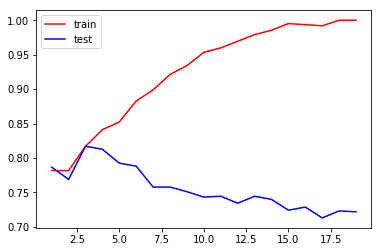

In [30]:
# 下面开始调参来提升预测率
train_scores = []
test_scores = []
scores = []
x_ticks = [*range(1, 20)]
for i in range(1, 20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    train_score = clf.fit(x_train, y_train).score(x_train, y_train)
    train_scores.append(train_score)
    
    test_score = clf.fit(x_test, y_test).score(x_test, y_test)
    test_scores.append(test_score)
    
    score_mean = model_selection.cross_val_score(clf, X, y, cv=10).mean()
    scores.append(score_mean)
plt.plot(x_ticks, train_scores, c='r', label='train')
plt.plot(x_ticks, scores, c='b', label='test')
print(max(scores), x_ticks[scores.index(max(scores))])
plt.legend()
plt.show()



In [31]:
# 由上图可知当max_depth大于3时出现过拟合
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(x_train, y_train)
clf.score(x_test, y_test)

0.7835820895522388

In [32]:
param = {'max_depth': [*range(1, 10)],
         'criterion': ('gini', 'entropy'),
         'min_samples_split': [*range(2, 40, 5)],
         'min_samples_leaf': [*range(2, 30, 3)]
        }
clf = tree.DecisionTreeClassifier(random_state=66)
gs = model_selection.GridSearchCV(clf, param_grid=param, cv=5, n_jobs=-1)
gs = gs.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [34]:
gs.best_score_

0.8186195826645265

In [35]:
clf = tree.DecisionTreeClassifier(random_state=66, 
                                  max_depth=3, 
#                                   min_samples_leaf=5, 
                                  ).fit(x_train, y_train)
clf.score(x_test, y_test)
    

0.8059701492537313

0.8134328358208955 1.0204081632653061


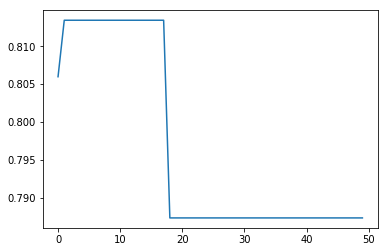

In [36]:
# 因为样本存在轻微的不均衡问题 我们再次调节class_weight
weight_arr = np.linspace(1, 2, 50)
scores = []
for weight in weight_arr:
    clf = tree.DecisionTreeClassifier(random_state=66, 
                                      max_depth=3, 
                                      class_weight={1:weight,0:1},
                                      ).fit(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    scores.append(test_score)
plt.plot(range(len(weight_arr)), scores)
print(max(scores), weight_arr[scores.index(max(scores))])
plt.show()


In [37]:
# 微调权重值 准确率又将近提升了一个百分点
clf = tree.DecisionTreeClassifier(random_state=66, 
                                  max_depth=3, 
                                  class_weight={1:1.0204081632653061,0:1},
                                  ).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8134328358208955

In [38]:
# 还是有点低 换模型再试试
clf = ensemble.RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8134328358208955

0.835820895522388 92


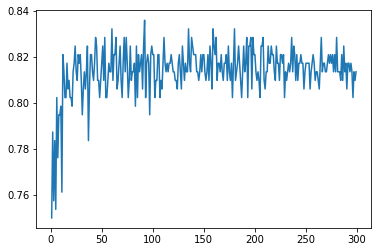

In [39]:
# n_estimators学习曲线
scores = []
x_ticks = [*range(1, 300)]
for i in range(1, 300):
    clf = ensemble.RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    scores.append(test_score)
    
plt.plot(range(1, 300), scores)
print(max(scores), x_ticks[scores.index(max(scores))])
plt.show()    



0.8246268656716418 224


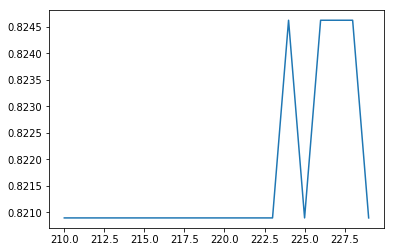

In [40]:
#  细化 n_estimators学习曲线
scores = []
x_ticks = [*range(210, 230)]
for i in range(210, 230):
    clf = ensemble.RandomForestClassifier(n_estimators=i, random_state=66).fit(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    scores.append(test_score)
    
plt.plot(x_ticks, scores)
print(max(scores), x_ticks[scores.index(max(scores))])
plt.show()  

In [41]:
clf = ensemble.RandomForestClassifier(n_estimators=224, random_state=66).fit(x_train, y_train)
clf.score(x_test, y_test)


0.8246268656716418

0.832089552238806 8


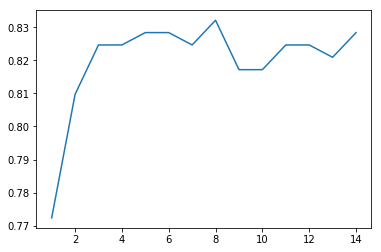

In [42]:
scores = []
x_ticks = [*range(1, 15)]
for i in range(1, 15):
    clf = ensemble.RandomForestClassifier(n_estimators=224, max_depth=i, random_state=66).fit(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    scores.append(test_score)
    
plt.plot(x_ticks, scores)
print(max(scores), x_ticks[scores.index(max(scores))])
plt.show()  

In [43]:
clf = ensemble.RandomForestClassifier(n_estimators=224, max_depth=8, random_state=66).fit(x_train, y_train)
clf.score(x_test, y_test)

0.832089552238806

In [44]:
# 更换criterion为信息熵 准确率 明显降低了 还是使用原来的gini
clf = ensemble.RandomForestClassifier(n_estimators=224, 
                                      max_depth=8, 
                                      random_state=66,
                                      criterion='entropy'
                                     ).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8208955223880597

0.832089552238806 1.0


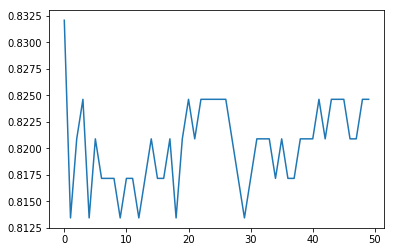

In [46]:
scores = []
weight_arr = np.linspace(1, 2, 50)
for weight in weight_arr:
    clf = ensemble.RandomForestClassifier(n_estimators=224, 
                                          max_depth=8, 
                                          random_state=66,
                                          class_weight={1:weight,0:1},
                                         ).fit(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    scores.append(test_score)
plt.plot(range(len(weight_arr)), scores)
print(max(scores), weight_arr[scores.index(max(scores))])
plt.show()

In [ ]:
param = {'max_depth': [*range(1, 10)],
         'criterion': ('gini', 'entropy'),
         'min_samples_leaf': [*range(2, 50, 5)],
         'min_impurity_decrease':[*np.linspace(0,0.5,20)]
        }

clf = ensemble.RandomForestClassifier(n_jobs=-1)
gs = model_selection.GridSearchCV(clf, param_grid=param, cv=10, n_jobs=-1)
gs = gs.fit(x_train, y_train)